# Dataset Exploration
*Author: Zeyu Li <zyli@cs.ucla.edu>*

*Date: Jan, 3, 2018*

This Jupyter-notebook serves as an explorer of the dataset. We do following things in this file:
1. Load dataframe from the csv file.
2. Select features that will be used in model
3. For each feature, do statistics or plot figures.

_Please note that not all attributes are looked at or plotted._

In [47]:
import os, sys
import pandas as pd
import numpy as np

DATA_DIR = "../data/"
RAW_DATA_FILE = DATA_DIR + "data.csv"

# Check if data dir or file exist
if not os.path.exists(DATA_DIR) \
    or not os.path.exists(RAW_DATA_FILE):
    print(
        "CANNOT find {} or {}".format(DATA_DIR, RAW_DATA_FILE),
        file=sys.stderr
    )
    sys.exit()

# Load csv data
raw_data = pd.read_csv(RAW_DATA_FILE)

# Columns that we think useful
COLS = [
            "property_id",
            "transaction_amount",
            "loan_amount",
            "lender",
            "transaction_date",
            "property_type",
            "year_built",
            "sqft",
            "property_address"
        ]

data = raw_data[COLS]

print(
    "\n=======================\n"
    "    DATA Overview\n"
    "=======================\n"
    "Size of Data: {:d}\n"
    "Zero Transction Amount {:d}\n"
    "Zero Loan Amount {:d}\n"
    "Num. of Lenders:{:d}, \n\t Num. of \"* Undisclosed\" {:d}\n"
    "Num. of property_type {:d}\n"
    .format(
        data.shape[0],
        data.transaction_amount.value_counts()[0],
        data.loan_amount.value_counts()[0],
        data.lender.nunique(),
        data.lender.value_counts()['* Undisclosed'],
        data.property_type.nunique()
    )
)


# Now draw plot to look at different distribution of data.
#     Transaction amount: ta
#     Loan amount: la
#     Lender: ld (might have long tail)
#     Transaction date: td
#     Property type: pt
#     Year built: yb
#     Square foot: sf
#     Property Address: pa






    DATA Overview
Size of Data: 158800
Zero Transction Amount 471
Zero Loan Amount 109618
Num. of Lenders:10074, 
	 Num. of "* Undisclosed" 110687
Num. of property_type 12



## Transaction Amount

In [49]:
# Get column of Transaction Amount to Numpy array
np_ta = data.as_matrix(columns=["transaction_amount"])\
            .transpose()
# Get maximum and minimum of transaction_amount
ta_min, ta_max = np.amin(np_ta), np.amax(np_ta)
ta_max, ta_min

(231000000, 0)

In [50]:
hist_ta, edge_ta = np.histogram(np_ta, bins=[x for x in range(ta_min, ta_max + 1000000, 1000000)])

print("Proportion of first 10 bins:", sum(hist_ta[:11]) * 100 / sum(hist_ta))
print("Proportion of first 20 bins:", sum(hist_ta[:21]) * 100 / sum(hist_ta))

Proportion of first 10 bins: 99.8923173804
Proportion of first 20 bins: 99.9590680101


Based on our observation of `hist_ta` and `edge_ta`, we decide to filter out some data entries by following constraint:

`transaction amount < 1,300,000`

## Loan amount

In [5]:
np_la = data.as_matrix(columns=['loan_amount'])\
            .transpose()

In [6]:
la_min, la_max = np.amin(np_la), np.amax(np_la)
print(la_min, la_max)

0.0 46499900.0


In [51]:
hist_la, edge_la = np.histogram(np_la, bins=[x for x in range(int(la_min), int(la_max), 100000)])

print("\nCount of non-zero entries:")
print(np.count_nonzero(np_la))

print("\nProportion of non-zero terms in loan amount")
print(np.count_nonzero(np_la) / np_la.shape[1])


Count of non-zero entries:
49182

Proportion of non-zero terms in loan amount
0.3097103274559194


## Lender

In [52]:
np_ld = data.as_matrix(columns=['lender'])\
            .transpose()
print("lenders in total", np_ld.size)
print("unique lenders", np.unique(np_ld).size)

values, counts = np.unique(np_ld,return_counts=True)
ind=np.argmax(counts)
print("Most Common", values[ind])
print("Count of that", counts[ind])


lenders in total 158800
unique lenders 10074
Most Common * Undisclosed
Count of that 110687


## Transaction Date

In [59]:
np_td = data.as_matrix(columns=['transaction_date'])\
            .transpose()
np_td.sort()
np_td_len = [len(x) for x in list(np_td[0])]
print("Number of dates that are non-empty:", np_td_len.count(10))


Number of dates that are non-empty: 158800


## Property Type

In [10]:
np_pt = data.as_matrix(columns=['property_type'])\
            .transpose()
pt_values, pt_counts = np.unique(np_pt, return_counts=True)
print(pt_values)
print(pt_counts)
print("Sum:", sum(pt_counts))

['RAPT' 'RCON' 'RCOO' 'RDUP' 'RMFD' 'RMOB' 'RMSC' 'RQUA' 'RSFR' 'RTIM'
 'RTRI' 'VRES']
[  1626  17255     33   3875   1482   2063   1452   1020 124417     15
    887   4675]
Sum: 158800


## Year built

In [61]:
np_yb = data.as_matrix(columns=['year_built'])\
            .transpose()
print(np.amin(np_yb), np.amax(np_yb))
print("Non-zero built year", np.count_nonzero(np_yb))
print("Zero built year", np_yb.size - np.count_nonzero(np_yb))
yb_values, yb_counts = np.unique(np_yb, return_counts=True)

print("\nYears of year_built")
print(yb_values)
print("\nCount of each year")
print(yb_counts)

0 2017
Non-zero built year 149564
Zero built year 9236

Years of year_built
[   0 1801 1808 1850 1860 1865 1870 1871 1873 1874 1875 1876 1877 1878 1879
 1880 1881 1882 1883 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895
 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910
 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925
 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940
 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017]

Count of each year
[9236   16    1    2    1    1    9    1    2    1    5    1    1    2    1
   10    1    1    1   16    4    1   10    8   99    5 

## Sqft

In [62]:
np_sr = data.as_matrix(columns=['sqft'])\
            .transpose()
print(np.amin(np_sr), np.amax(np_sr))
print("# of Non-zero square foot", np.count_nonzero(np_sr))
print("# of Zero Square foot", np_sr.size - np.count_nonzero(np_sr))

0 9621009
# of Non-zero square foot 152158
# of Zero Square foot 6642


Let's take a look at the entries where __sqft__ is 0 to see if there are some common traits.

In [65]:
sqft_zero = data.loc[data['sqft'] == 0]
print("Size of Square feet zero", sqft_zero.size)
# Uncomment to see the entries that has zero
# print(sqft_zero[['transaction_amount', 'year_built', 'property_type']])

Size of Square feet zero 59778


In [66]:
print(sqft_zero['year_built'].value_counts()[:11])

0       6349
1900     175
2016      13
1974       7
1964       5
1979       5
1978       5
1990       4
1980       4
1988       4
2000       4
Name: year_built, dtype: int64


If both `year_built` and `sqft` are zero, we are then losing too much information. So we decided to remove those entries. Hence, we have following 2 constraints:
1. Transaction amout < 1,300,000
2. Year built and Square feet cannot be both 0

## Creating new datasets after constraints applied

In [15]:
newdata = data.copy()
newdata = newdata.loc[ newdata['transaction_amount'] < 13000000 ]
newdata = newdata.loc[ (newdata['year_built'] != 0) & (newdata['sqft'] != 0) ]

In [16]:
newdata.shape[0]

149199

In [68]:
# bz: both zero
bz = data.loc[ (data['year_built'] == 0) & (data['sqft'] == 0)]
print(bz.shape[0])

6349


In [69]:
tal = data.loc[ (data['transaction_amount']) > 13000000]
print(tal.shape[0])

139


In [70]:
print(bz.shape[0] + tal.shape[0])

6488


## New data distribution

### Transaction Amount

In [71]:
nta = newdata.as_matrix(columns=["transaction_amount"])\
             .transpose()
nta_hist, nta_edge = np.histogram(nta, bins=[x for x in range(0,2000001,50000)])

In [72]:
import matplotlib.pyplot as plt

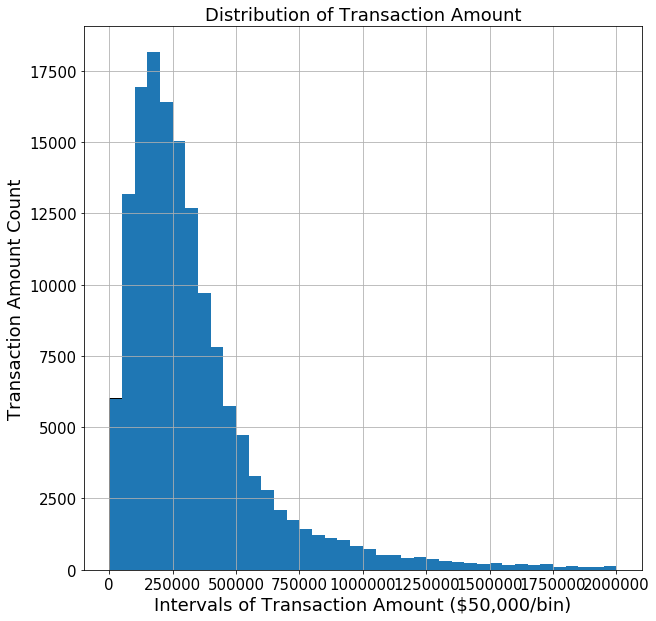

In [73]:
center = (nta_edge[:-1] + nta_edge[1:]) / 2
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(center, 
       nta_hist, 
       align='center', 
       width=np.diff(nta_edge),
       edgecolor='black')
ax.set_xticks(nta_edge[::5])

plt.xlabel('Intervals of Transaction Amount ($50,000/bin)', fontsize=18)
plt.ylabel('Transaction Amount Count', fontsize=18)
plt.title('Distribution of Transaction Amount', fontsize=18)

plt.grid(True)
# plt.axis([40, 160, 0, 0.03])
plt.show()

### Loan Amount

In [74]:
nla = newdata.as_matrix(columns=["loan_amount"])\
             .transpose()

In [75]:
nla_nz = nla[np.nonzero(nla)]

In [76]:
nla_nz_min = np.amin(nla_nz)
nla_nz_max = np.amax(nla_nz)
print(nla_nz_min, nla_nz_max)

1.0 16000000.0


In [77]:
nla_nz_hist, nla_nz_edge = np.histogram(nla_nz, bins=[x for x in range(0,2000001,50000)])

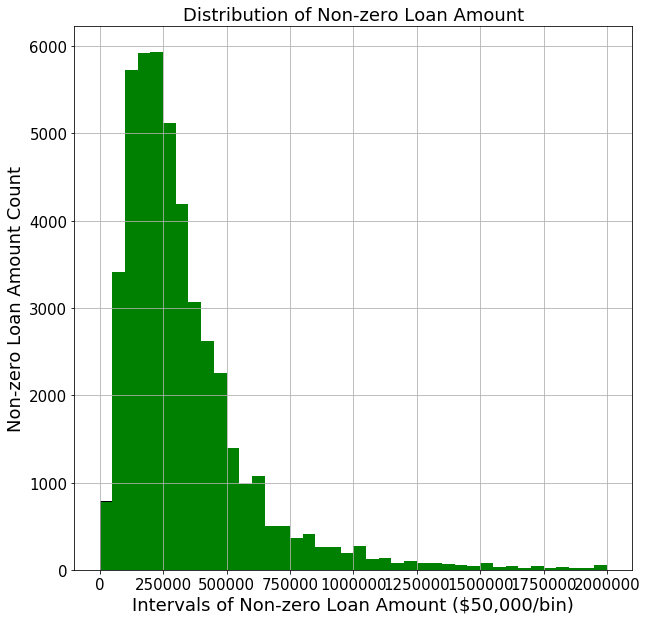

In [78]:
center = (nla_nz_edge[:-1] + nla_nz_edge[1:]) / 2
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(center, 
       nla_nz_hist, 
       align='center', 
       width=np.diff(nla_nz_edge),
       color='green',
       edgecolor='black')
ax.set_xticks(nla_nz_edge[::5])

plt.xlabel('Intervals of Non-zero Loan Amount ($50,000/bin)', fontsize=18)
plt.ylabel('Non-zero Loan Amount Count', fontsize=18)
plt.title('Distribution of Non-zero Loan Amount', fontsize=18)

plt.grid(True)
# plt.axis([40, 160, 0, 0.03])
plt.show()

### Transaction Date
After the plot is made, I found that `matplotlib` is not as beautiful as Excel work. Therefore, this figure is not present in the slides.

In [79]:
from datetime import datetime
ntd = newdata.as_matrix(columns=["transaction_date"])\
             .transpose()
ntd_yr = [datetime.strptime(td, "%Y-%m-%d").year for td in ntd[0]]
years, yrs_cnt = np.unique(ntd_yr, return_counts=True)

In [80]:
print(years, yrs_cnt)

[2012 2013 2014 2015 2016 2017] [20949 38035 28861 27174 24293  9887]


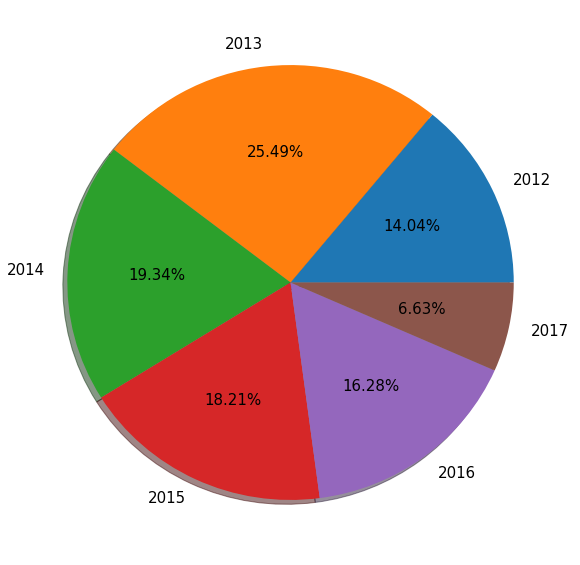

In [82]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts= ax.pie(yrs_cnt, 
                                  labels=years,
                                  autopct='%1.2f%%',
                                  shadow=True)
plt.show()

### Property Type

In [83]:
npt = newdata.as_matrix(columns=["property_type"])
types, tps_cnt = np.unique(npt, return_counts=True)

print(list(types))
print(tps_cnt)

['RAPT', 'RCON', 'RCOO', 'RDUP', 'RMFD', 'RMOB', 'RMSC', 'RQUA', 'RSFR', 'RTIM', 'RTRI', 'VRES']
[  1458  16359     32   3769   1122   1747    959    986 121355      2
    860    550]


### Year Built
Not presented in slides.

In [84]:
nyb = newdata.as_matrix(columns=["year_built"])\
             .transpose()

nyb_yr, ybry_counts = np.unique(nyb, return_counts=True)

### Lender
Not presented in slides.

In [40]:
nld = newdata.as_matrix(columns=['lender'])\
             .transpose()
    
nld_name, ld_counts = np.unique(nld, return_counts=True)
print(len(nld_name))
print(nld_name)
print(ld_counts)

9623 ['* OTHER INSTITUTIONAL LEN' '* Undisclosed' '1 VALLEY VIEW GROUP LLC' ...,
 'ZUTHER' 'ZWETTLER TRUST (RT)' 'ZWINGER']
[  1176 103468      1 ...,      3      1      1]


In [85]:
pdld = newdata['lender']
pdld.value_counts()['LendingHome']

758

We can see that the dataset, with more than 15k samples, only has 758 samples of `LendingHome`. The size of this subset is less then enough to tell convincingly how LendingHome 